In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\ABHI WORK\DATASETS\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
print('Null values in dataset:', sum(df.isnull().sum()))

Null values in dataset: 0


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df['Attrition'] = [1 if i == 'Yes' else 0 for i in df['Attrition']]

changes = []
for columns in df.columns:
    fields = []
    if df[columns].dtype == 'object':
        value = 0
        catDict = {}
        for key in df[columns].unique():
            catDict.update({key:value})
            value +=1
        changes.append([columns,catDict])
        for record in df[columns]:
            fields.append(catDict.get(record))
        df[columns] = fields
        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

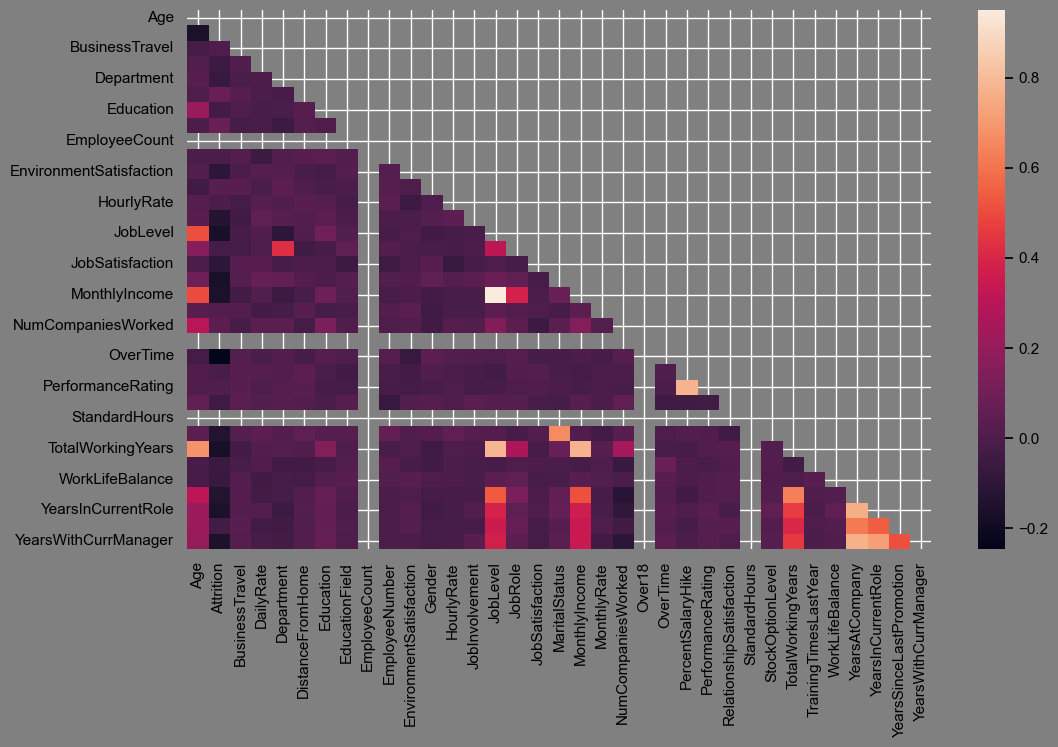

In [9]:
sns.set(rc={'axes.facecolor':'grey',
       'figure.facecolor':'grey',
       'text.color':'black',
       'xtick.color':'black',
       'ytick.color':'black',
       'axes.labelcolor':'black'})

plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask=mask)

plt.show()

In [10]:
print(df['EmployeeCount'].unique())
print(df['Over18'].unique())
print(df['StandardHours'].unique())

[1]
[0]
[80]


In [11]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

In [12]:
for i in changes:
    print(i)

['BusinessTravel', {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}]
['Department', {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}]
['EducationField', {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}]
['Gender', {'Female': 0, 'Male': 1}]
['JobRole', {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}]
['MaritalStatus', {'Single': 0, 'Married': 1, 'Divorced': 2}]
['Over18', {'Y': 0}]
['OverTime', {'Yes': 0, 'No': 1}]


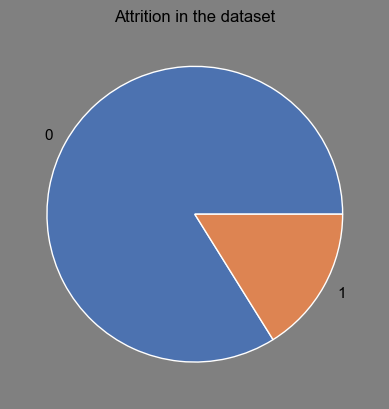

In [13]:
plt.pie(df['Attrition'].value_counts(), labels=df['Attrition'].value_counts().keys())
plt.title(label='Attrition in the dataset')

plt.show()

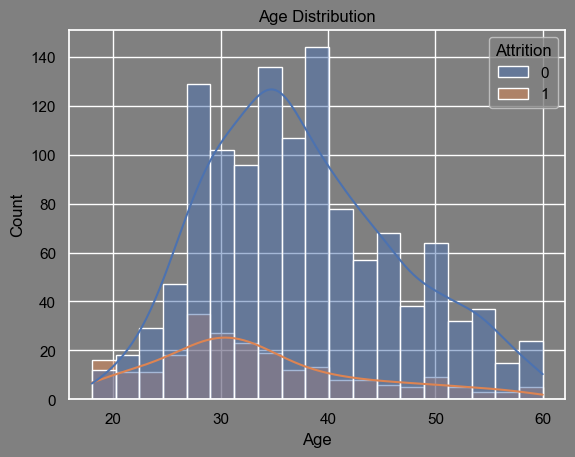

In [14]:











sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title(label='Age Distribution')

plt.show()

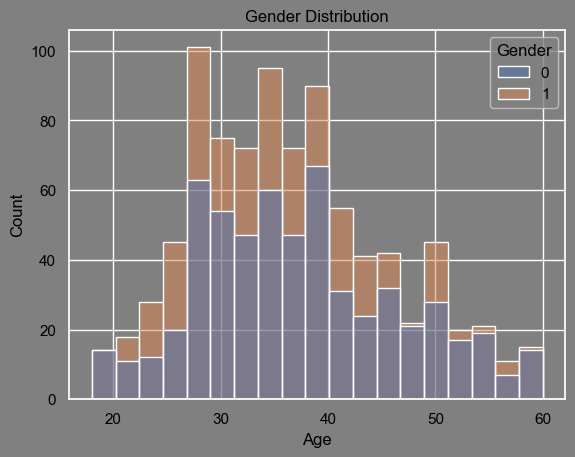

[{'Female': 0, 'Male': 1}]


In [15]:
sns.histplot(data=df, x='Age', hue='Gender')
plt.title(label='Gender Distribution')

plt.show()
print([i[1] for i in changes if i[0] == 'Gender'])

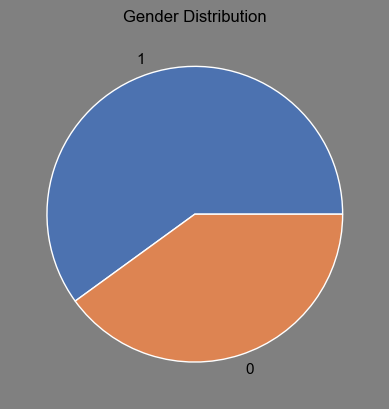

[{'Female': 0, 'Male': 1}]


In [16]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().keys())
plt.title(label='Gender Distribution')

plt.show()
print([i[1] for i in changes if i[0] == 'Gender'])

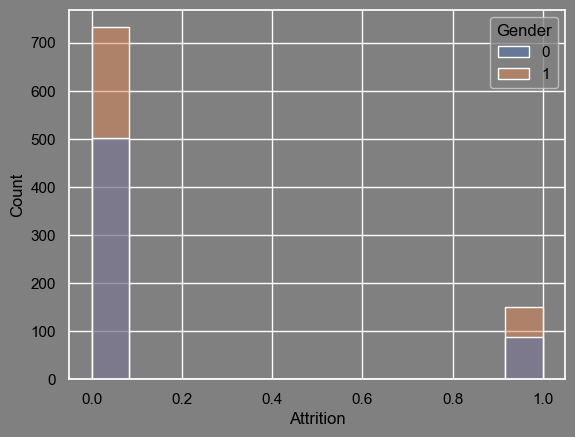

[{'Female': 0, 'Male': 1}]


In [17]:




sns.histplot(data=df, x='Attrition', hue='Gender')

plt.show()
print([i[1] for i in changes if i[0] == 'Gender'])

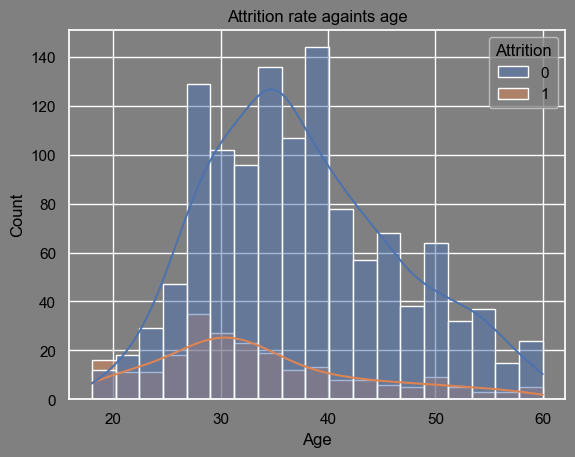

In [18]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title(label='Attrition rate againts age')

plt.show()

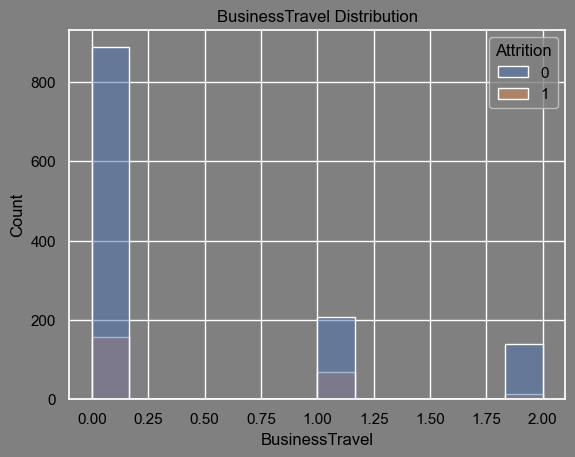

[{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}]


In [19]:
sns.histplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title(label='BusinessTravel Distribution')

plt.show()
print([i[1] for i in changes if i[0] == 'BusinessTravel'])

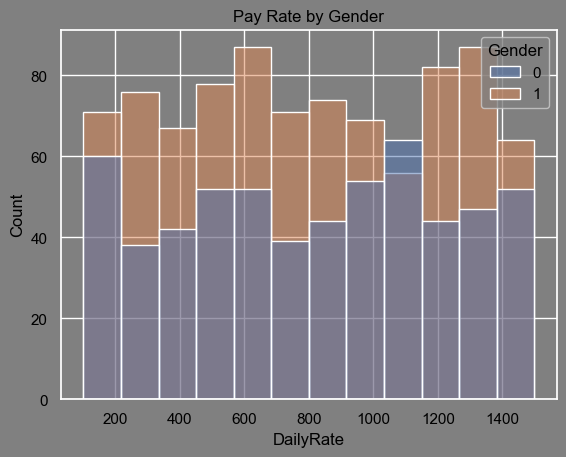

[{'Female': 0, 'Male': 1}]


In [20]:
sns.histplot(data=df, x='DailyRate', hue='Gender')
plt.title(label='Pay Rate by Gender')

plt.show()
print([i[1] for i in changes if i[0] == 'Gender'])

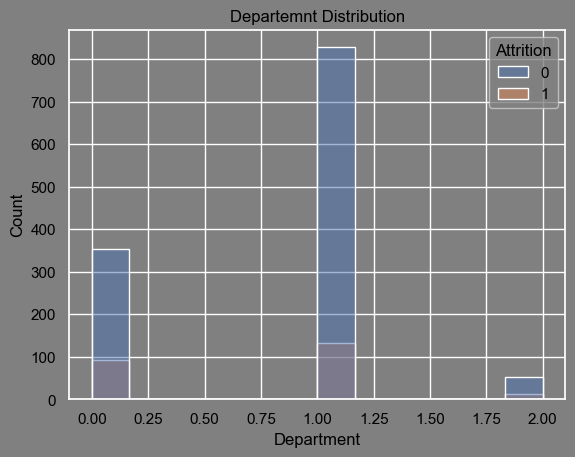

[{'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}]


In [21]:
sns.histplot(data=df, x='Department', hue='Attrition')
plt.title(label='Departemnt Distribution')

plt.show()
print([i[1] for i in changes if i[0] == 'Department'])

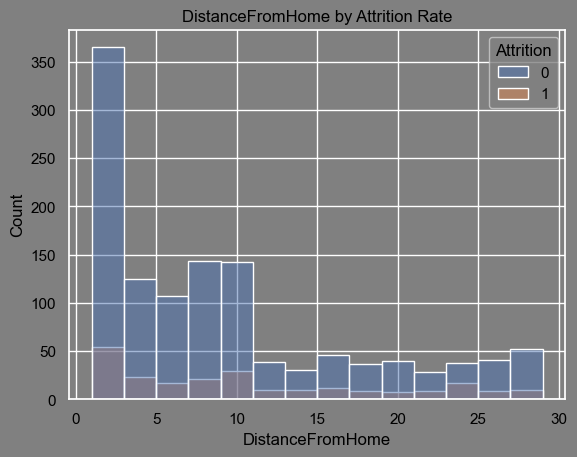

In [22]:
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition')
plt.title(label='DistanceFromHome by Attrition Rate')

plt.show()

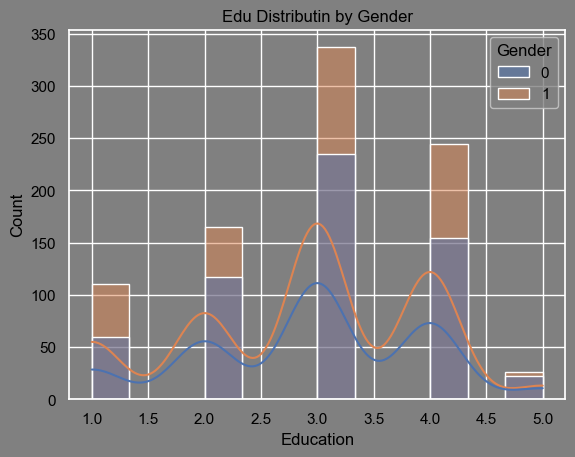

1 Below Collage 2 Collage 3 Bachelor 4 Master 5 Doctor
[{'Female': 0, 'Male': 1}]


In [23]:


sns.histplot(data=df, x='Education', hue='Gender', kde=True)
plt.title(label='Edu Distributin by Gender')

plt.show()
print(1, 'Below Collage', 2, 'Collage', 3, 'Bachelor', 4, 'Master', 5, 'Doctor')
print([i[1] for i in changes if i[0] == 'Gender'])

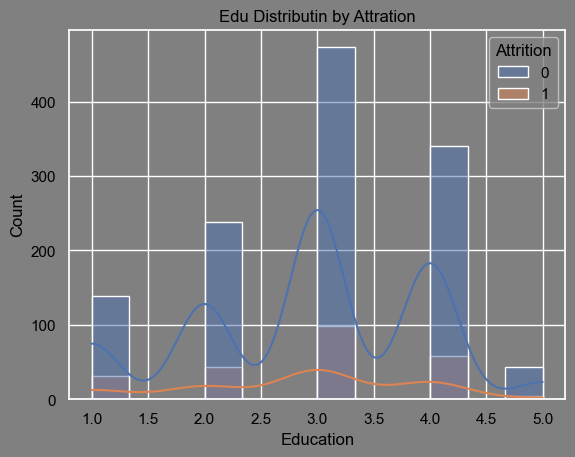

1 Below Collage 2 Collage 3 Bachelor 4 Master 5 Doctor


In [24]:
sns.histplot(data=df, x='Education', hue='Attrition', kde=True)
plt.title(label='Edu Distributin by Attration')

plt.show()
print(1, 'Below Collage', 2, 'Collage', 3, 'Bachelor', 4, 'Master', 5, 'Doctor')

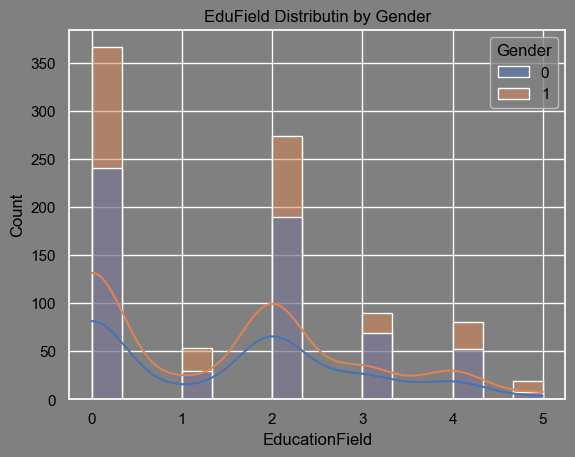

[{'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}]
[{'Female': 0, 'Male': 1}]


In [25]:
sns.histplot(data=df, x='EducationField', hue='Gender', kde=True)
plt.title(label='EduField Distributin by Gender')

plt.show()
print([i[1] for i in changes if i[0] == 'EducationField'])
print([i[1] for i in changes if i[0] == 'Gender'])

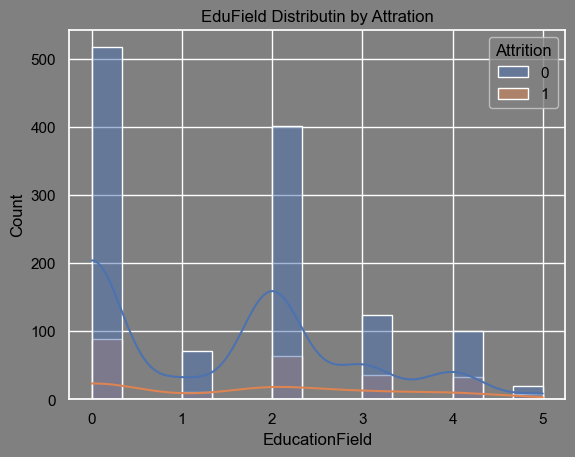

[{'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}]


In [26]:
sns.histplot(data=df, x='EducationField', hue='Attrition', kde=True)
plt.title(label='EduField Distributin by Attration')

plt.show()
print([i[1] for i in changes if i[0] == 'EducationField'])

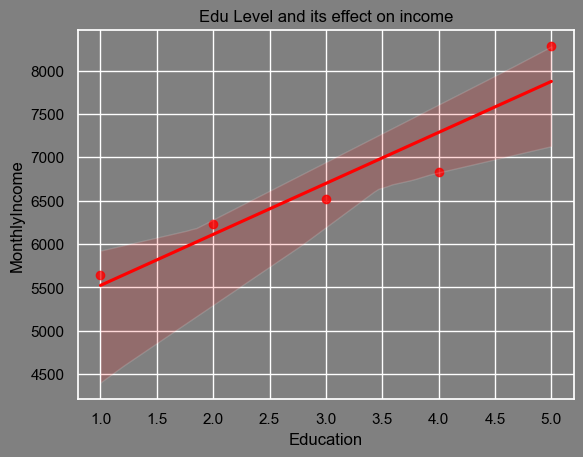

1 Below Collage 2 Collage 3 Bachelor 4 Master 5 Doctor


In [27]:
sns.regplot(x=df.groupby('Education').mean()['MonthlyIncome'].keys(),
           y=df.groupby('Education').mean()['MonthlyIncome'],color='Red')
plt.title(label='Edu Level and its effect on income')

plt.show()
print(1, 'Below Collage', 2, 'Collage', 3, 'Bachelor', 4, 'Master', 5, 'Doctor')

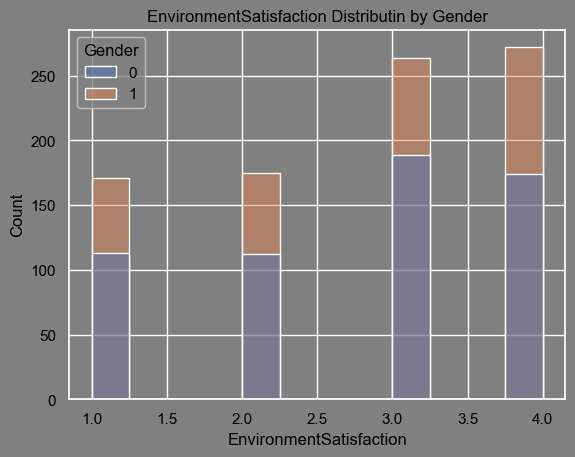

1 Low 2 Medium 3 High 4 Veri High
[{'Female': 0, 'Male': 1}]


In [28]:
sns.histplot(data=df, x='EnvironmentSatisfaction', hue='Gender')
plt.title(label='EnvironmentSatisfaction Distributin by Gender')

plt.show()
print(1, 'Low', 2, 'Medium', 3, 'High', 4, 'Veri High')
print([i[1] for i in changes if i[0] == 'Gender'])